In [ ]:
import os
import numpy as np
from time import time
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn import datasets
from sklearn.manifold import TSNE
unary_or_rel='unary' 
result_dir='C:/Users/56-000M100-32/Arthur/ct-base/result_4_3d/'
pcs_dir='C:/Users/56-000M100-32/Arthur/ct-base/1027/'+unary_or_rel+'_feat/'
save_dir='C:/Users/56-000M100-32/Arthur/ct-base/1027/'+unary_or_rel+'_feat/stne_plot/'
truth_dir='C:/Users/56-000M100-32/Arthur/ct-base/ct_dataset/1007dataset_clearnone/label_xyz/'
subjects=os.listdir(result_dir)

In [ ]:
 
def plot_embedding(data, label, title, classes=10):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
 
    fig = plt.figure(figsize=(15,15))
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / classes),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

In [ ]:
def generate_group(seg):
    
    full_group=np.unique(seg)
    #full_group=full_group.tolist()
    full_group2point=seg
   
    group_to_point_full={}
    
    for j in range(len(full_group2point)):
        if full_group2point[j] not in group_to_point_full:
            group_to_point_full[full_group2point[j]]=[]
        group_to_point_full[full_group2point[j]].append(j)
    #print(group_to_point_full)
    groups_full=list(set(full_group)&set(group_to_point_full.keys()))
    print(len(groups_full))
    print(len(group_to_point_full))
    idxs=np.array(group_to_point_full[int(groups_full[0])])
    
    print(int(groups_full[0]))
    print(idxs)
    return groups_full

In [ ]:
new_label=[]
new_xyz=[]
for j,sub in enumerate(subjects[:-1]):
    print(sub)
    load_path=result_dir+sub
    r=open(load_path,'r')
    label=np.genfromtxt(r,delimiter=",",usemask=True)
    print(label.shape)
    r.close()
    
    pcs_path=pcs_dir+sub[:-4]+'.npy'
    print(pcs_path)
    array=np.load(pcs_path)
    #array=array[:,4]
    print(array.shape)
    
    truth_path=truth_dir+sub[:-8]+'.txt'
    r=open(truth_path,'r')
    truth=np.genfromtxt(r,delimiter=",",usemask=True)
    #print(truth)
    r.close()
    truth=truth[:,-2:]
    idxs=truth[:,-1]
    #print((truth))    
    
    #print((idxs)) 
    #a=generate_group(seg)
    #print(a)
    
    for i in range(len(label)):
        if i in idxs:
            where=np.where(idxs==i)
            #print((truth[where]))
            
            new_label.append(10000000+int(truth[where][0][0]))
            new_xyz.append(array[i])
        elif i%1000==0:
            new_label.append(int(label[i]))
            new_xyz.append(array[i])
    
    print(len(new_xyz),len(new_label))
tsne = TSNE(n_components=2, init='pca', random_state=0)
result = tsne.fit_transform(new_xyz)
print(result)
    
    
        
    
fig = plot_embedding(result, new_label,'t-SNE embedding of the digits (%s)' % (sub[25:-8]))
#save_path=save_dir+sub[25:-8]+'_'+unary_or_rel+'.png'
save_path=save_dir+'allsubjects'+'_'+unary_or_rel+'.png'
#plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show(fig)
    

0825_sz128_dist25_thd400_Pat10nBlock.pth.txt
(87542,)
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat10nBlock.pth.npy
(87542, 32)
120 120
0825_sz128_dist25_thd400_Pat1Block.pth.txt
(69485,)
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat1Block.pth.npy
(69485, 32)
219 219
0825_sz128_dist25_thd400_Pat2Block.pth.txt
(60026,)
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat2Block.pth.npy
(60026, 32)
304 304
0825_sz128_dist25_thd400_Pat3Block.pth.txt
(85654,)
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat3Block.pth.npy
(85654, 32)
422 422
0825_sz128_dist25_thd400_Pat4Block.pth.txt
(58514,)
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat4Block.pth.npy
(58514, 32)
511 511
0825_sz128_dist25_thd400_Pat5Block.pth.txt
(59887,)
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat5Block.pth.npy
(5

In [ ]:
class_result=[]
class_label=[]
for j in range(10):
    class_result.append([])
    class_label.append([])
    for i,num in enumerate(new_label):
        if num==j:
            class_result[j].append(result[i])
            class_label[j].append(num)
    fig = plot_embedding(class_result[j], class_label[j],'t-SNE embedding of all subjects class (%s)' % (j))
    #save_path=save_dir+'all'+str(j)+'_'+unary_or_rel+'.png'
    #plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show(fig)

In [201]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.neighbors import NearestNeighbors


In [138]:
def k_means_clustering(class_result,n_clusters):
    k_means=KMeans(n_clusters=n_clusters,random_state=42)
    k_means.fit(class_result)
    fig = plot_embedding(class_result, k_means.labels_,'k_means clustering of all subjects class (%s)' % (i),100)
    plt.show(fig)
    
    

In [139]:
def DBSCAN_default(class_result):
    dbscan=DBSCAN()
    dbscan.fit(class_result)
    fig = plot_embedding(class_result, dbscan.labels_,'k_means clustering of all subjects class (%s)' % (i))
    plt.show(fig)

In [187]:
def observe_and_decide_epsilon(class_result):
    neigh = NearestNeighbors(n_neighbors=5)
    nbrs = neigh.fit(class_result)
    distances, indices = nbrs.kneighbors(class_result)
    # Plotting K-distance Graph
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    print(np.array(distances).mean(),np.array(distances).std(),np.percentile(distances, 90))
    #plt.figure(figsize=(20,10))
    #plt.plot(distances)
    #plt.title('K-distance Graph',fontsize=20)
    #plt.xlabel('Data Points sorted by distance',fontsize=14)
    #plt.ylabel('Epsilon',fontsize=14)
    #plt.show()
    return np.array(distances).mean()+np.array(distances).std()

In [193]:
def DBSCAN_opt(class_result,epsilon):
    dbscan_opt=DBSCAN(eps=epsilon,min_samples=5)
    dbscan_opt.fit(class_result)

    from collections import Counter
    c=Counter(dbscan_opt.labels_)


    fig = plot_embedding(class_result, dbscan_opt.labels_,'k_means clustering of all subjects class (%s)' % (i),len(c))



    plt.show(fig)

    return len(c),c[-1]

In [200]:
def OPTIC_clustering(class_result):
    optic=OPTICS()
    optic.fit(class_result)

    from collections import Counter
    c=Counter(optic.labels_)


    fig = plot_embedding(class_result, optic.labels_,'k_means clustering of all subjects class (%s)' % (i),len(c))



    plt.show(fig)

    return len(c),c[-1]

0.8341830723720733 1.8498766783233793 1.3115771863516552
2.684059750695453


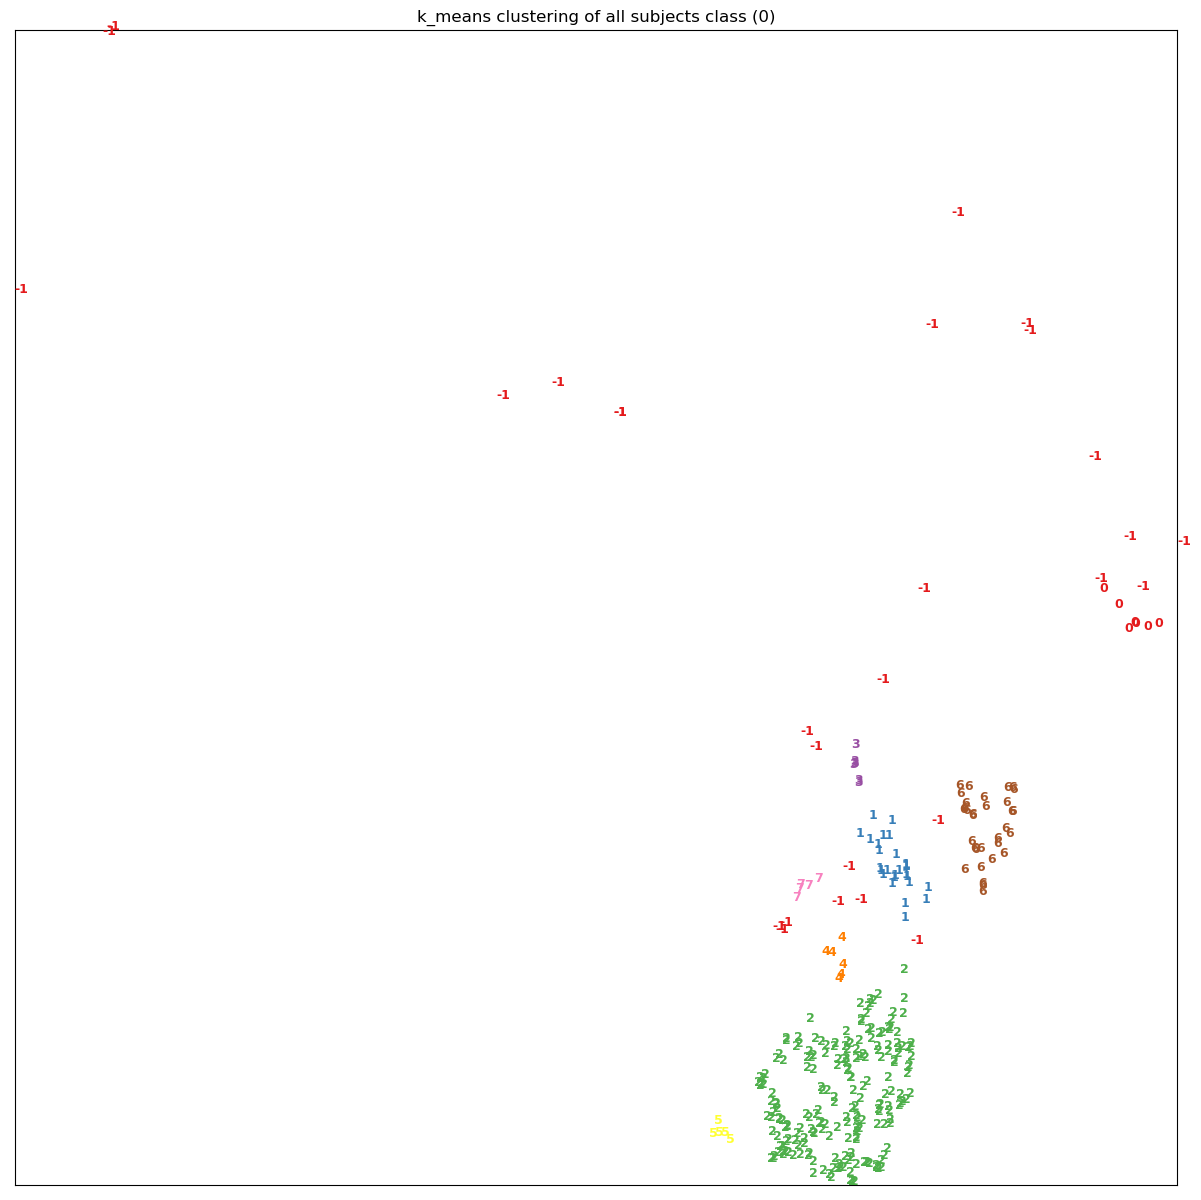

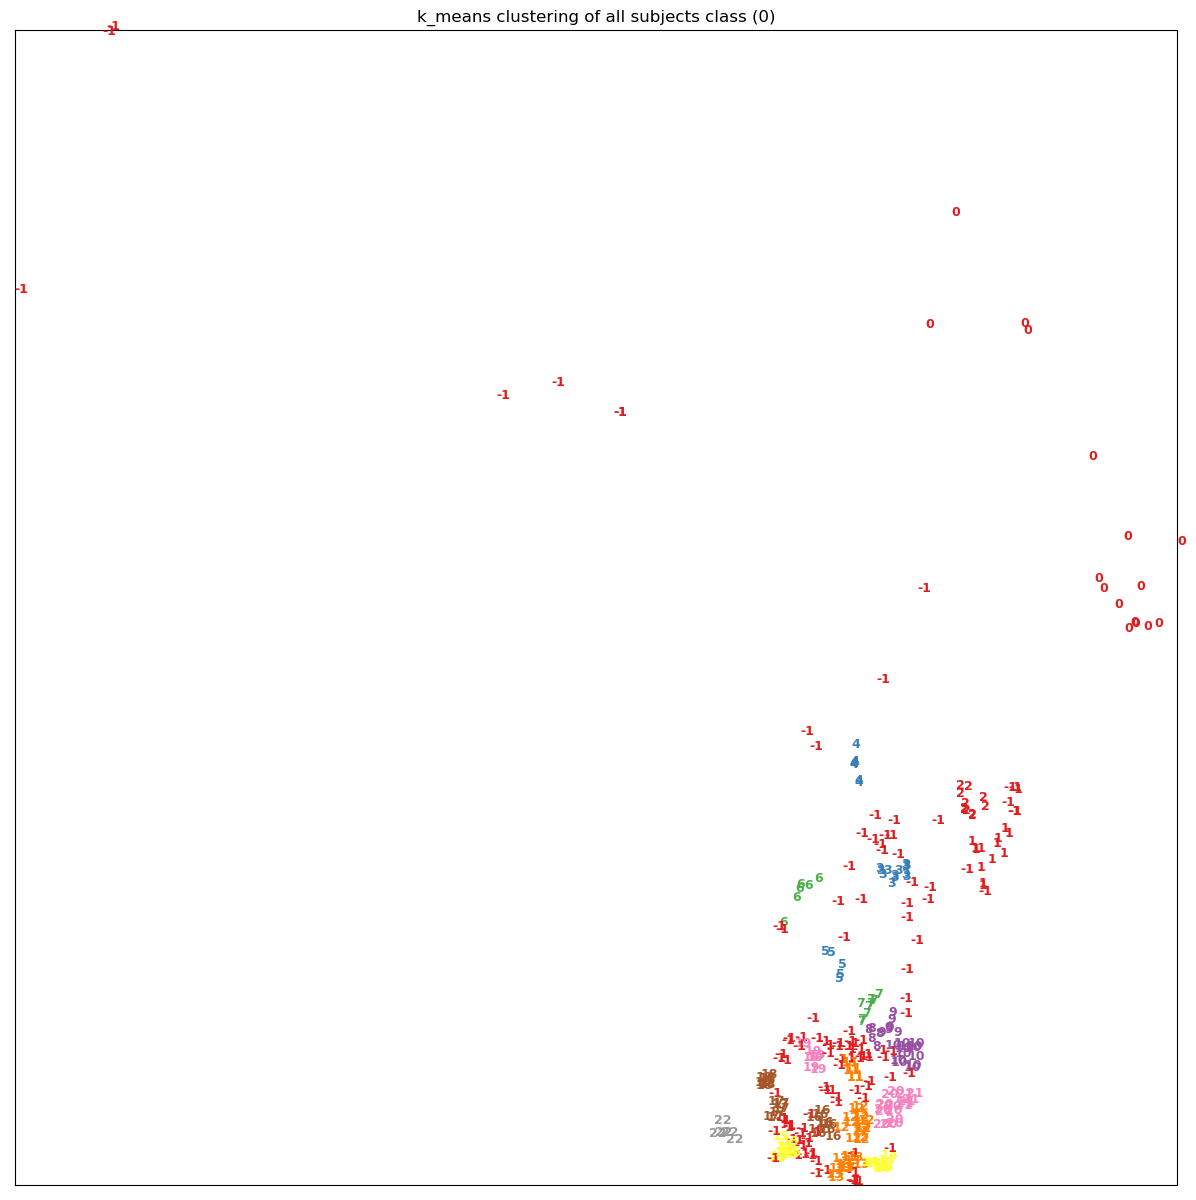

0.7629607776169857 1.507364818316156 1.457712199387007
2.2703255959331416


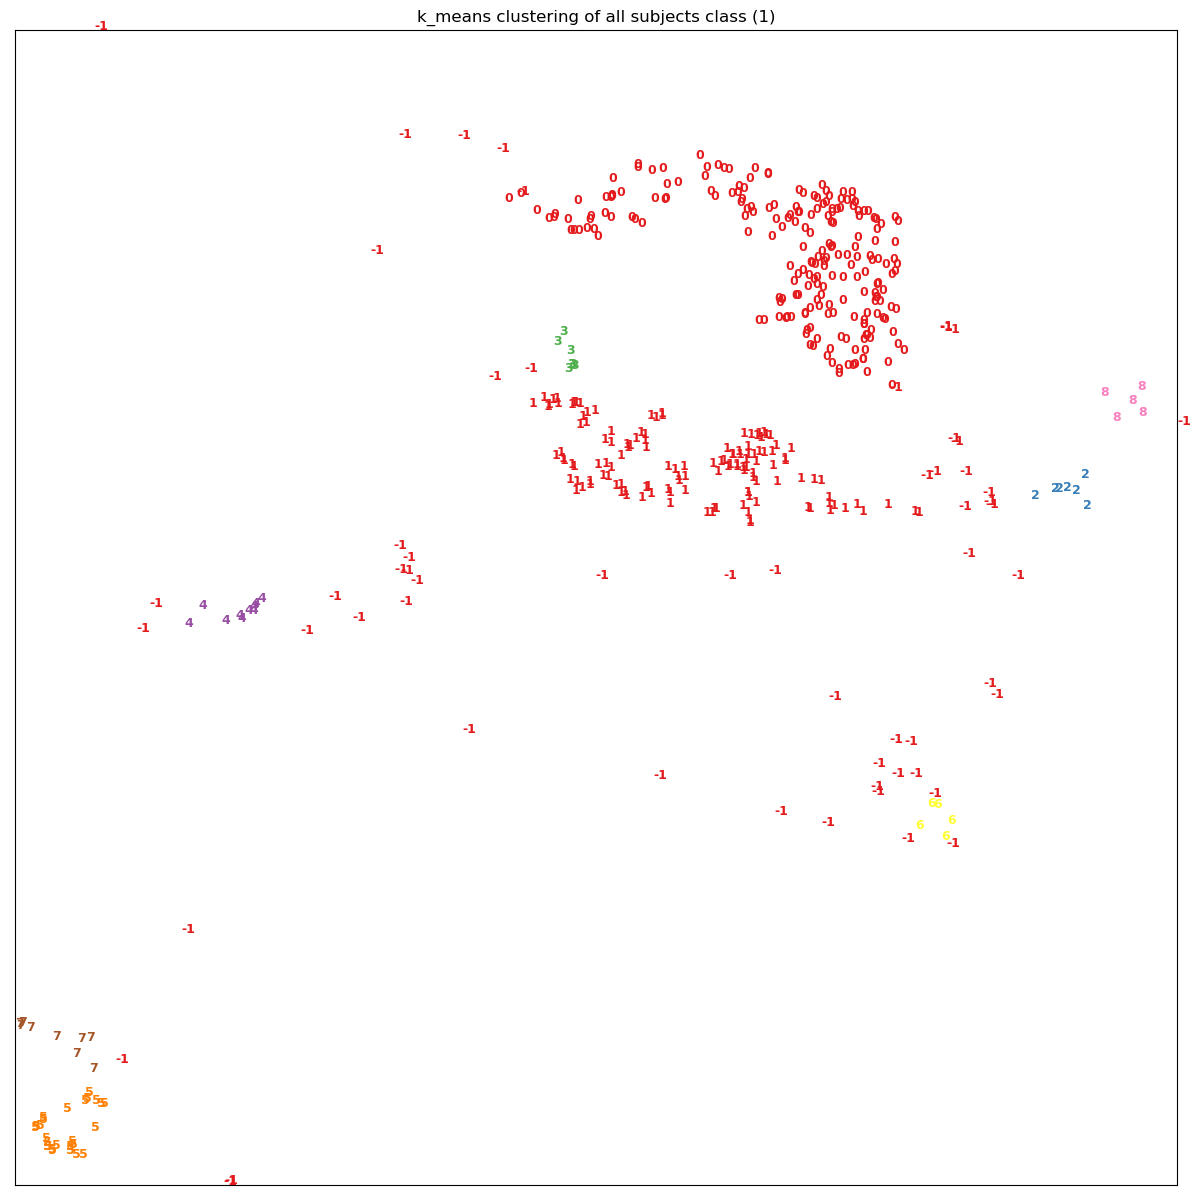

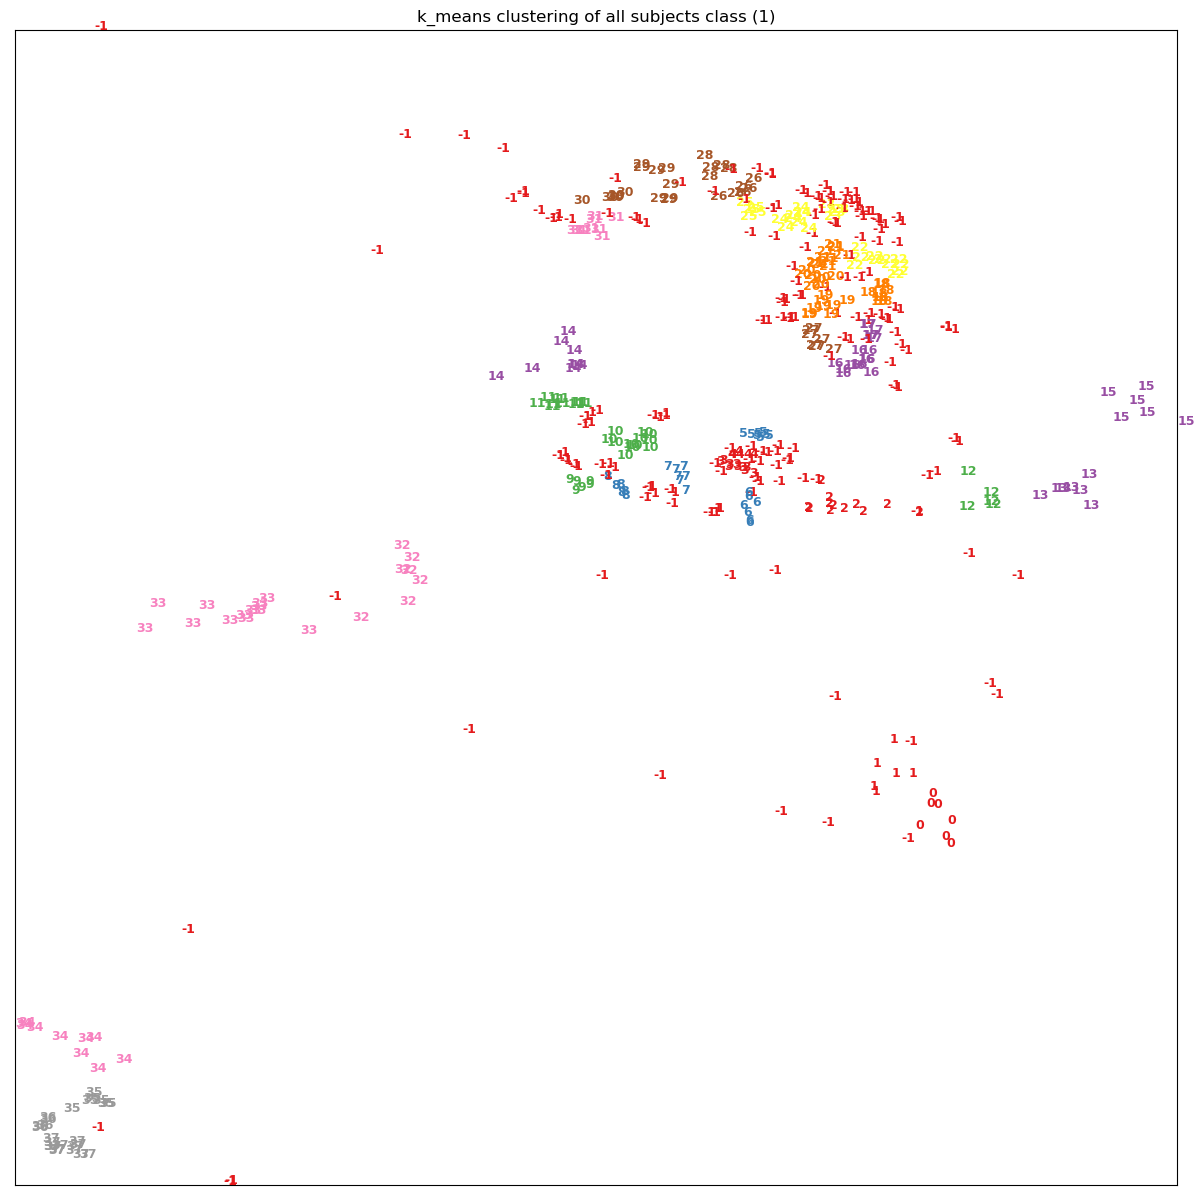

1.2057685063229724 1.8874653351256334 2.460291652405199
3.0932338414486056


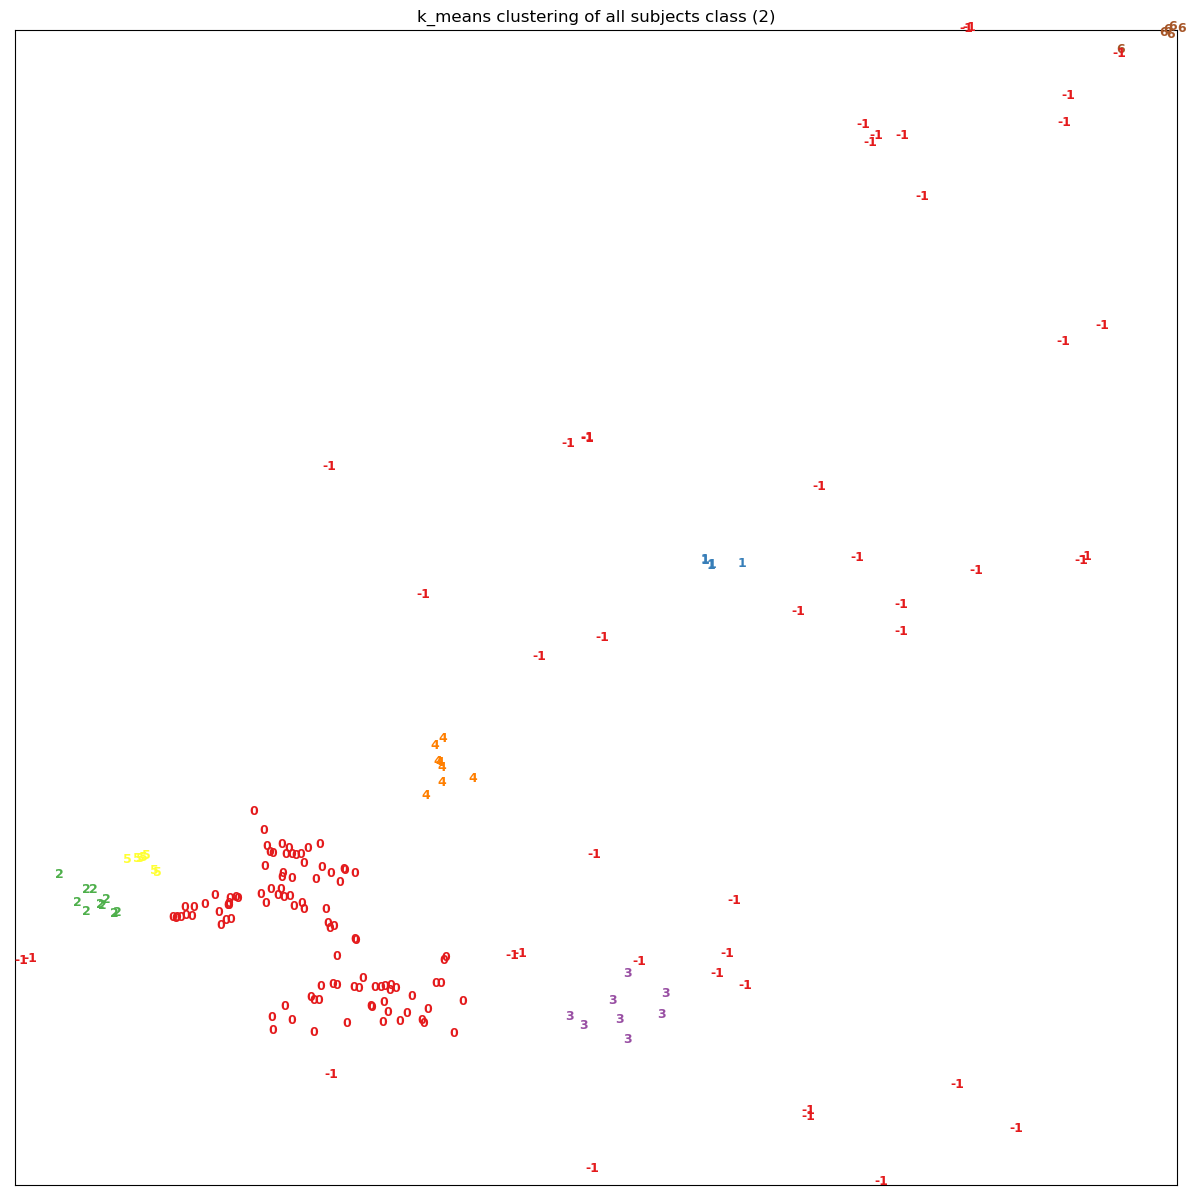

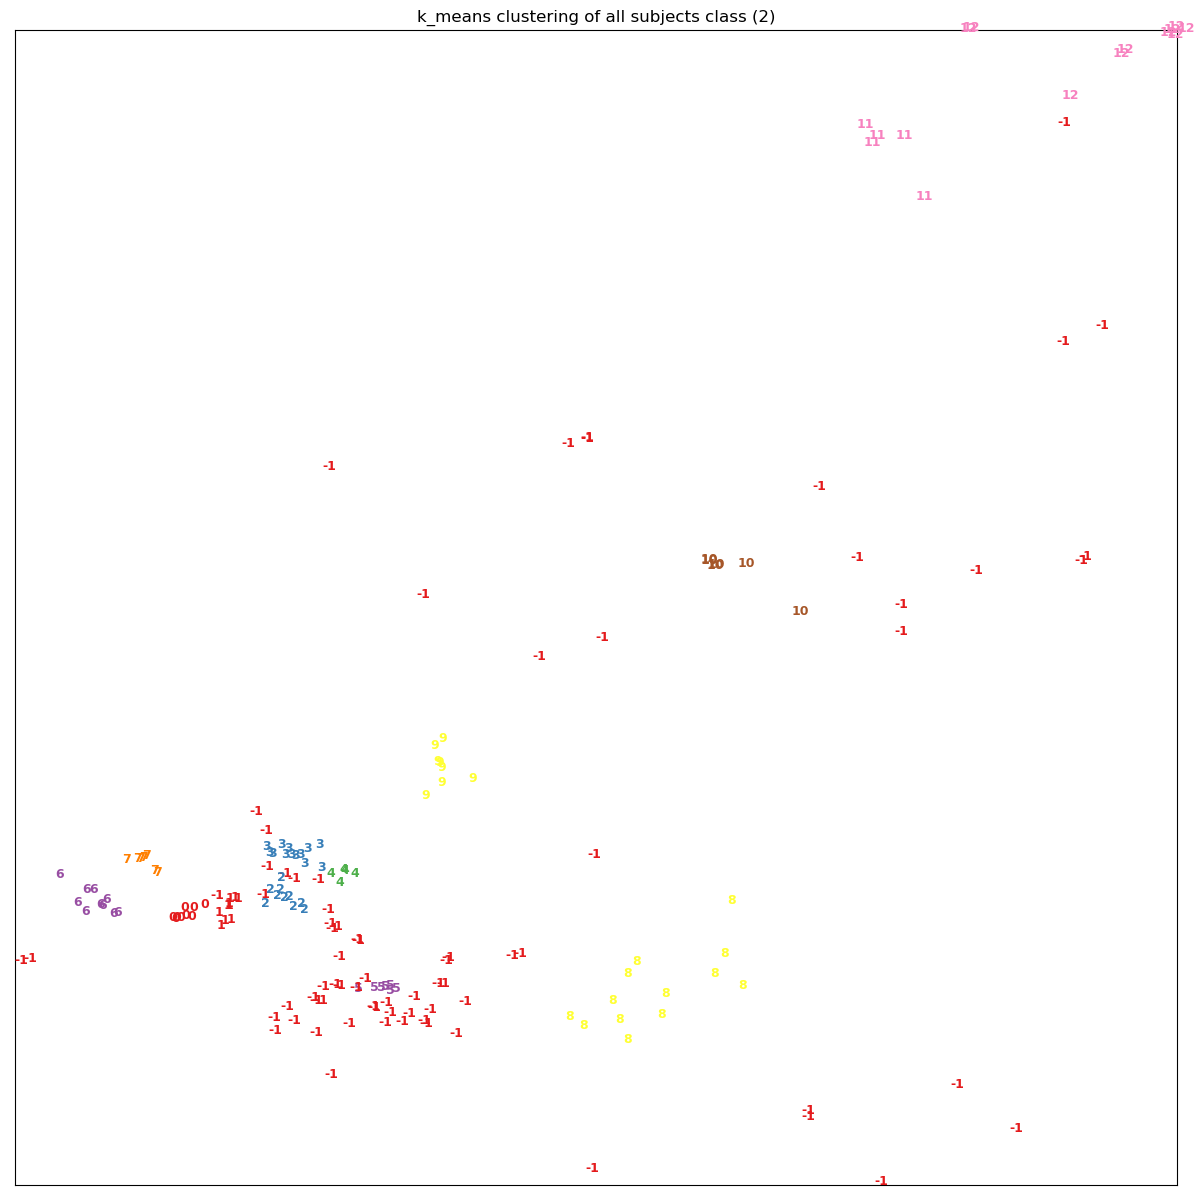

1.1070635044700583 3.647733022600994 1.5120887443073174
4.754796527071052


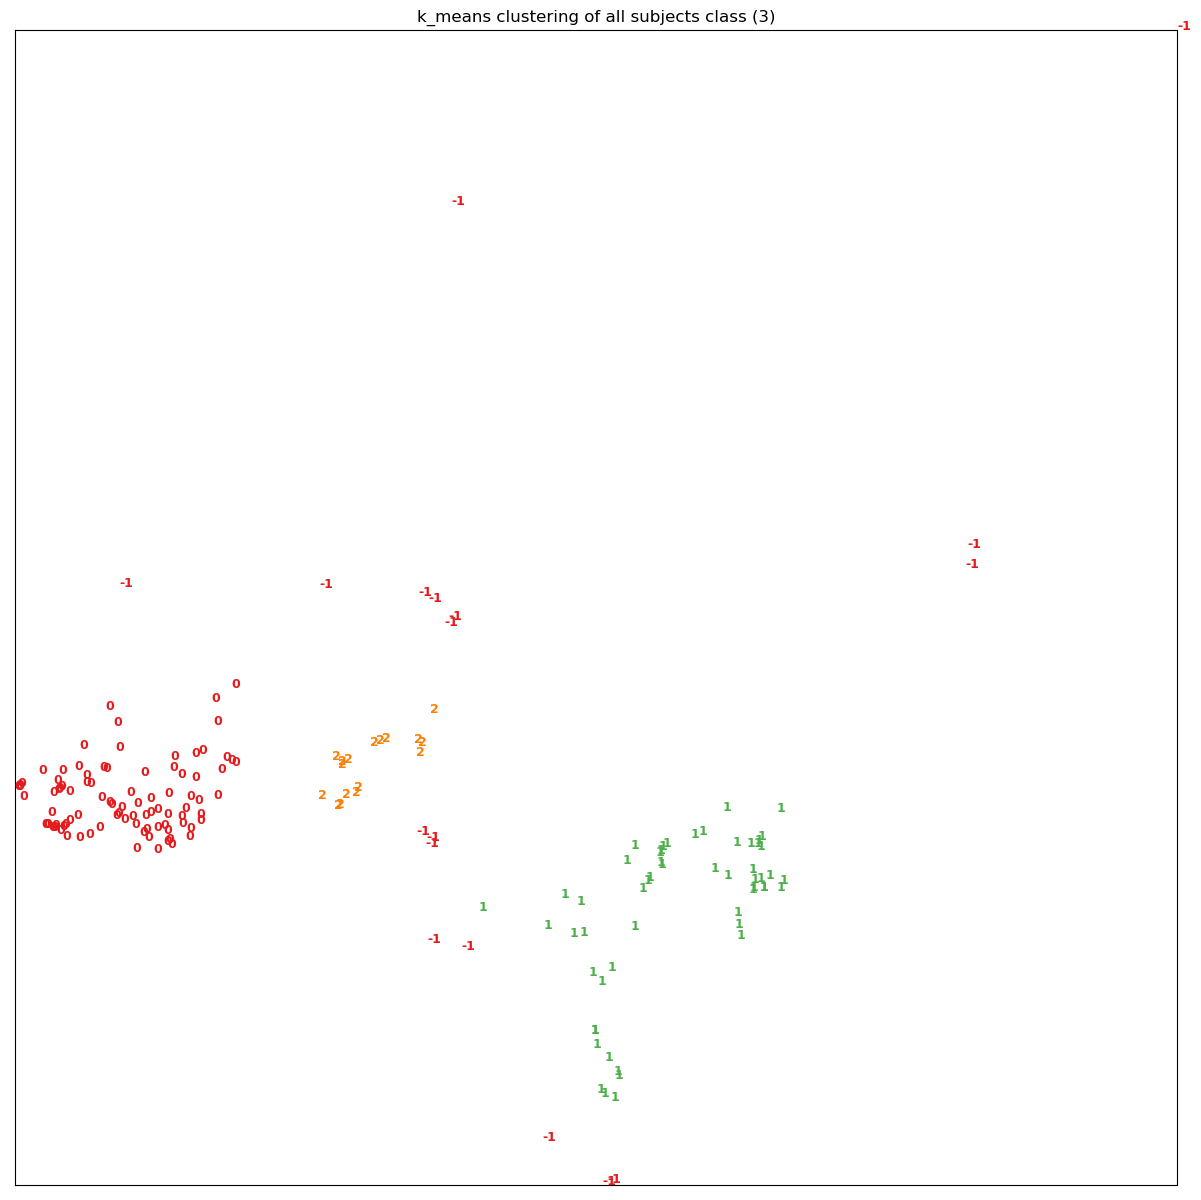

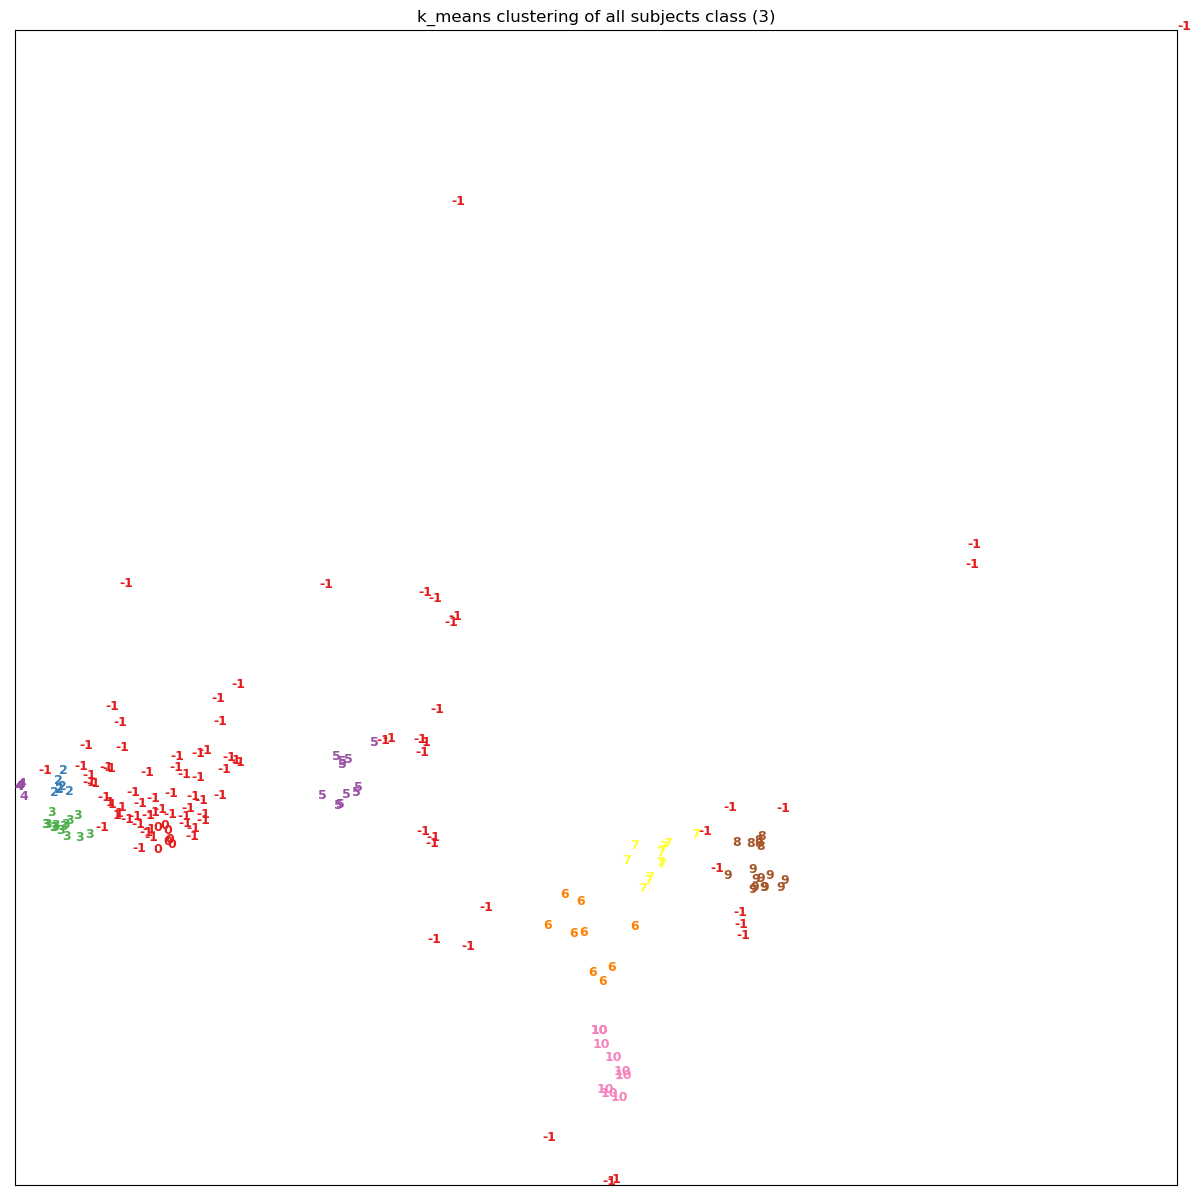

0.6683345879932968 0.9774473885982098 1.1109401938987362
1.6457819765915067


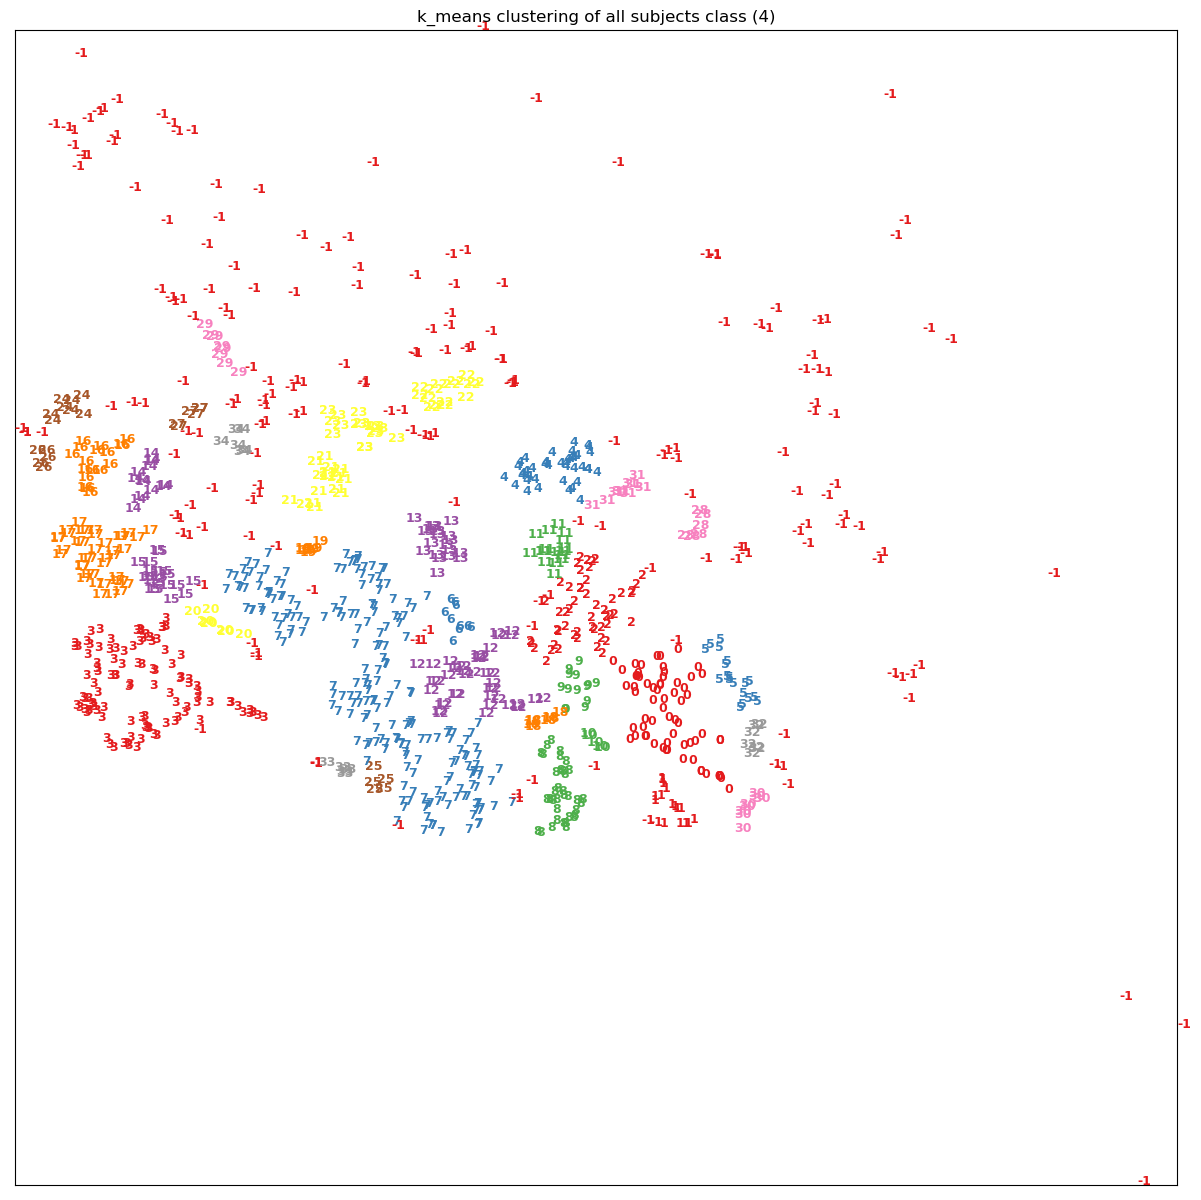

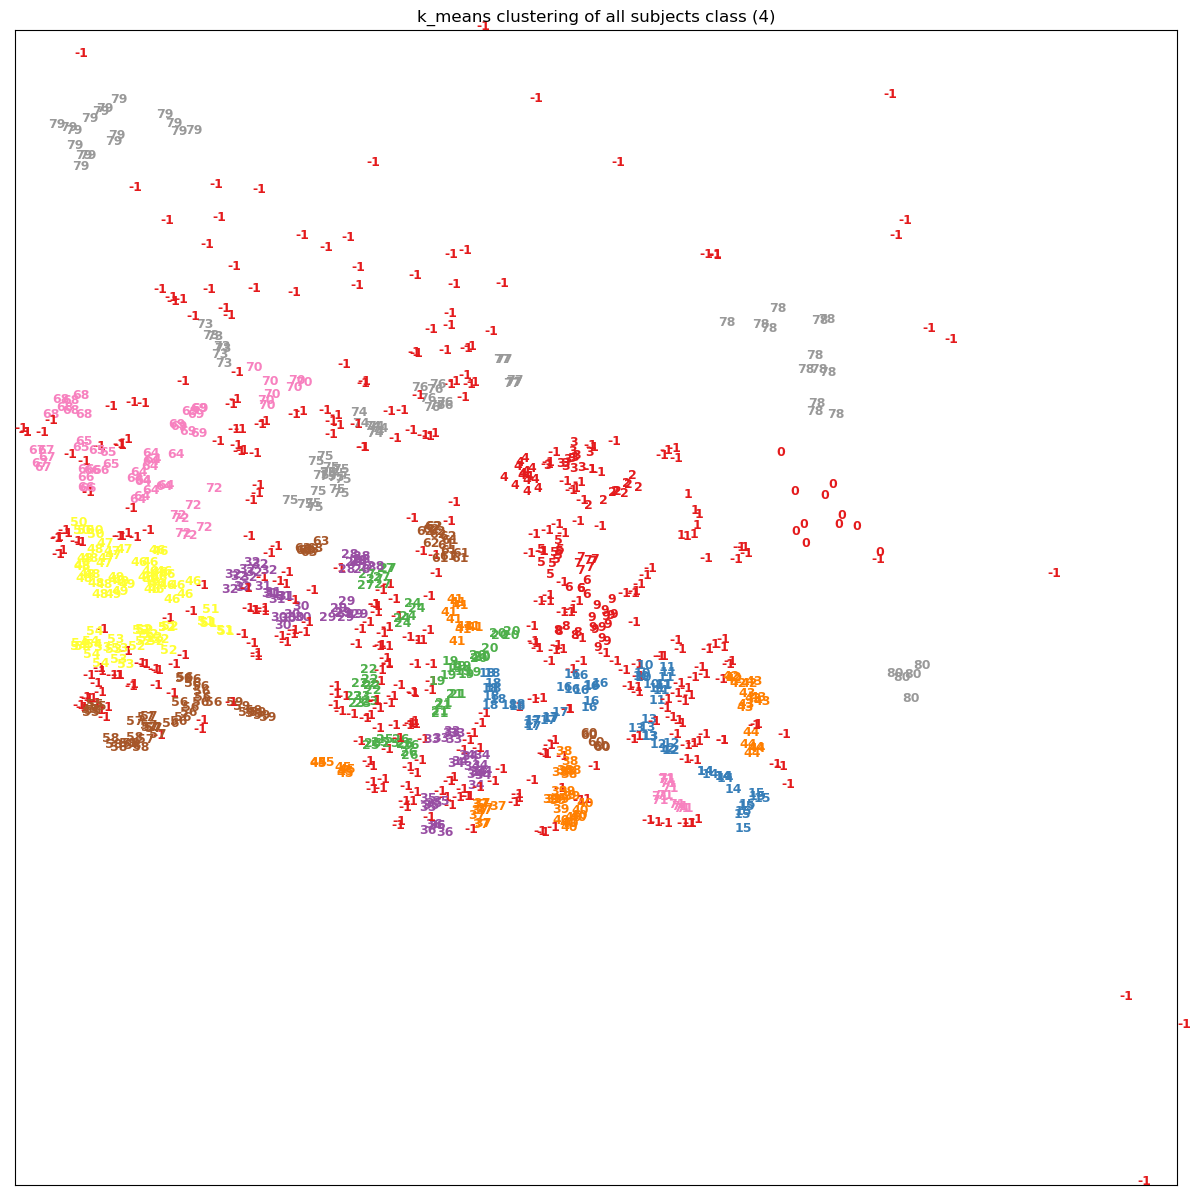

0.8264817907897642 1.0150411645882558 1.607001323106606
1.8415229553780201


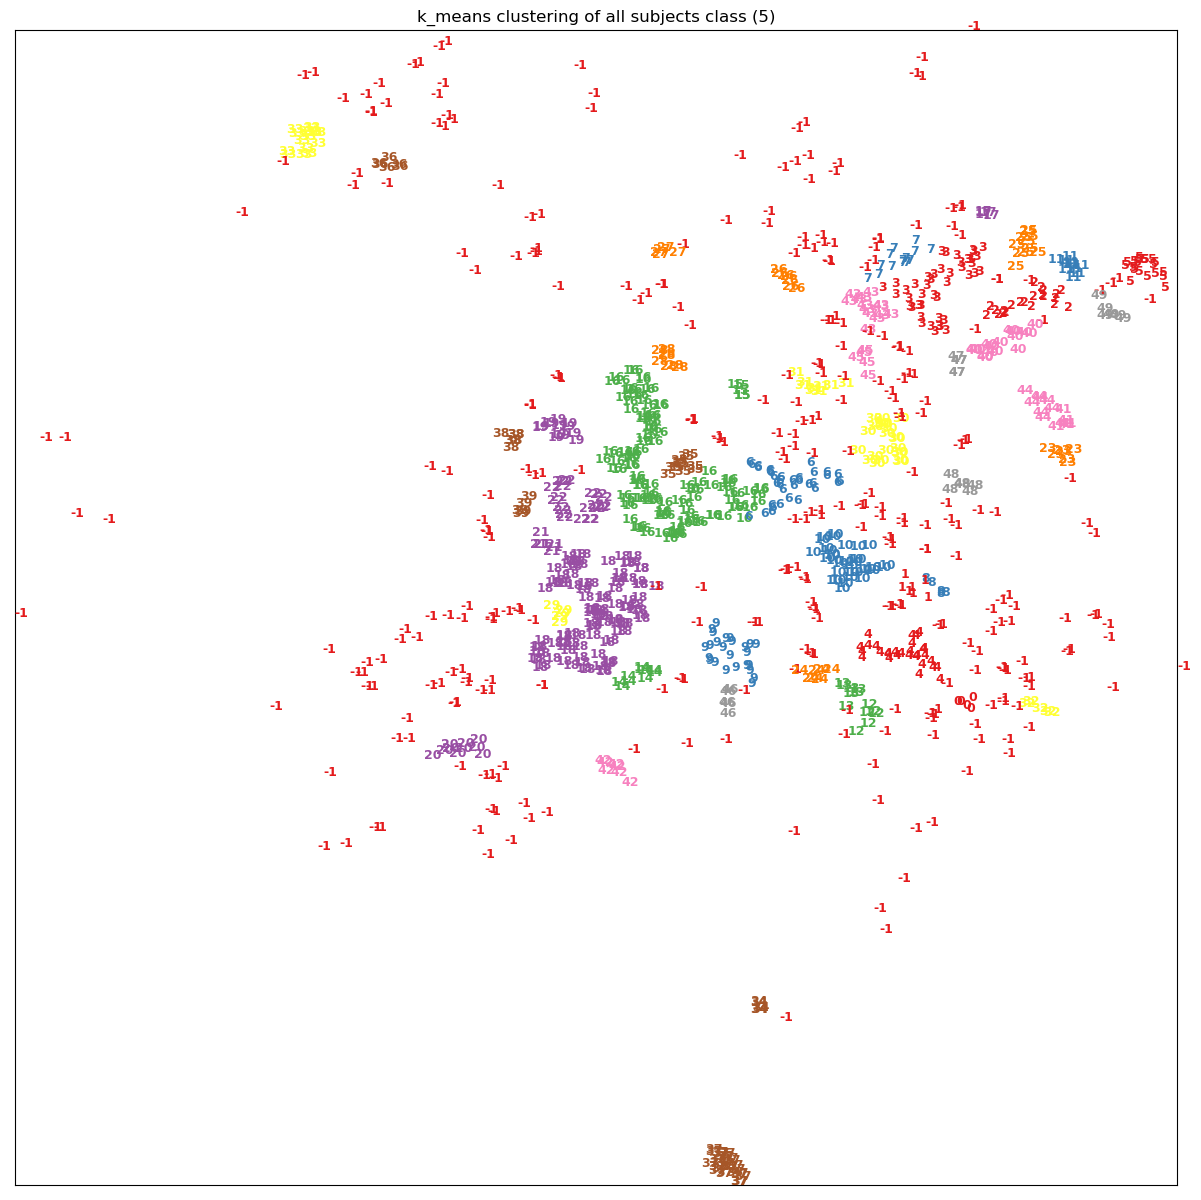

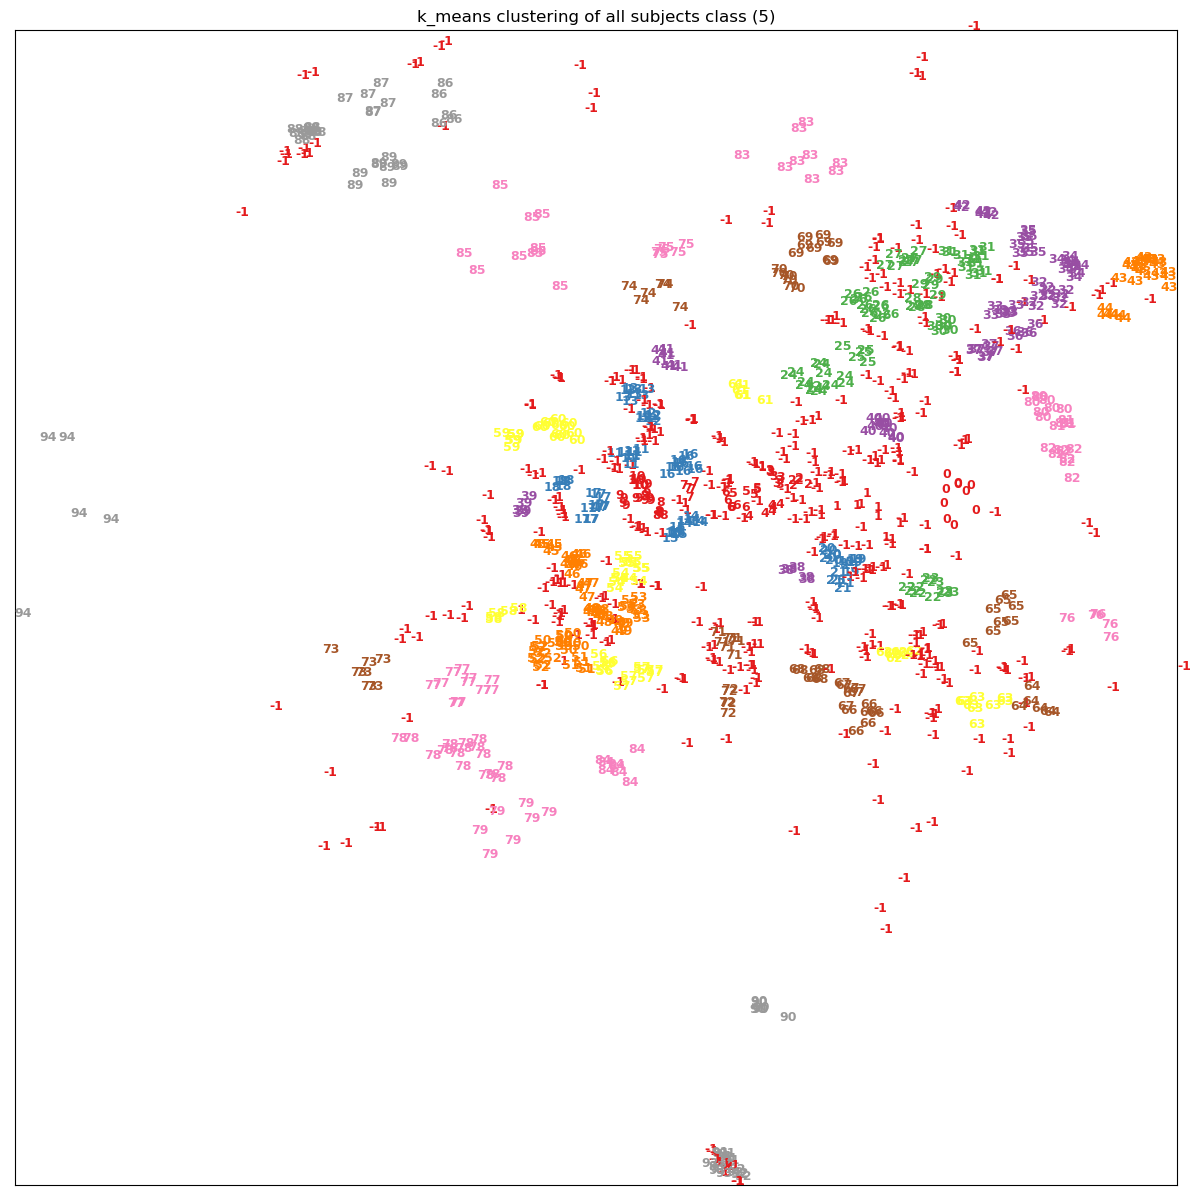

0.6431092788969982 0.6764523984794419 1.2177624724099576
1.31956167737644


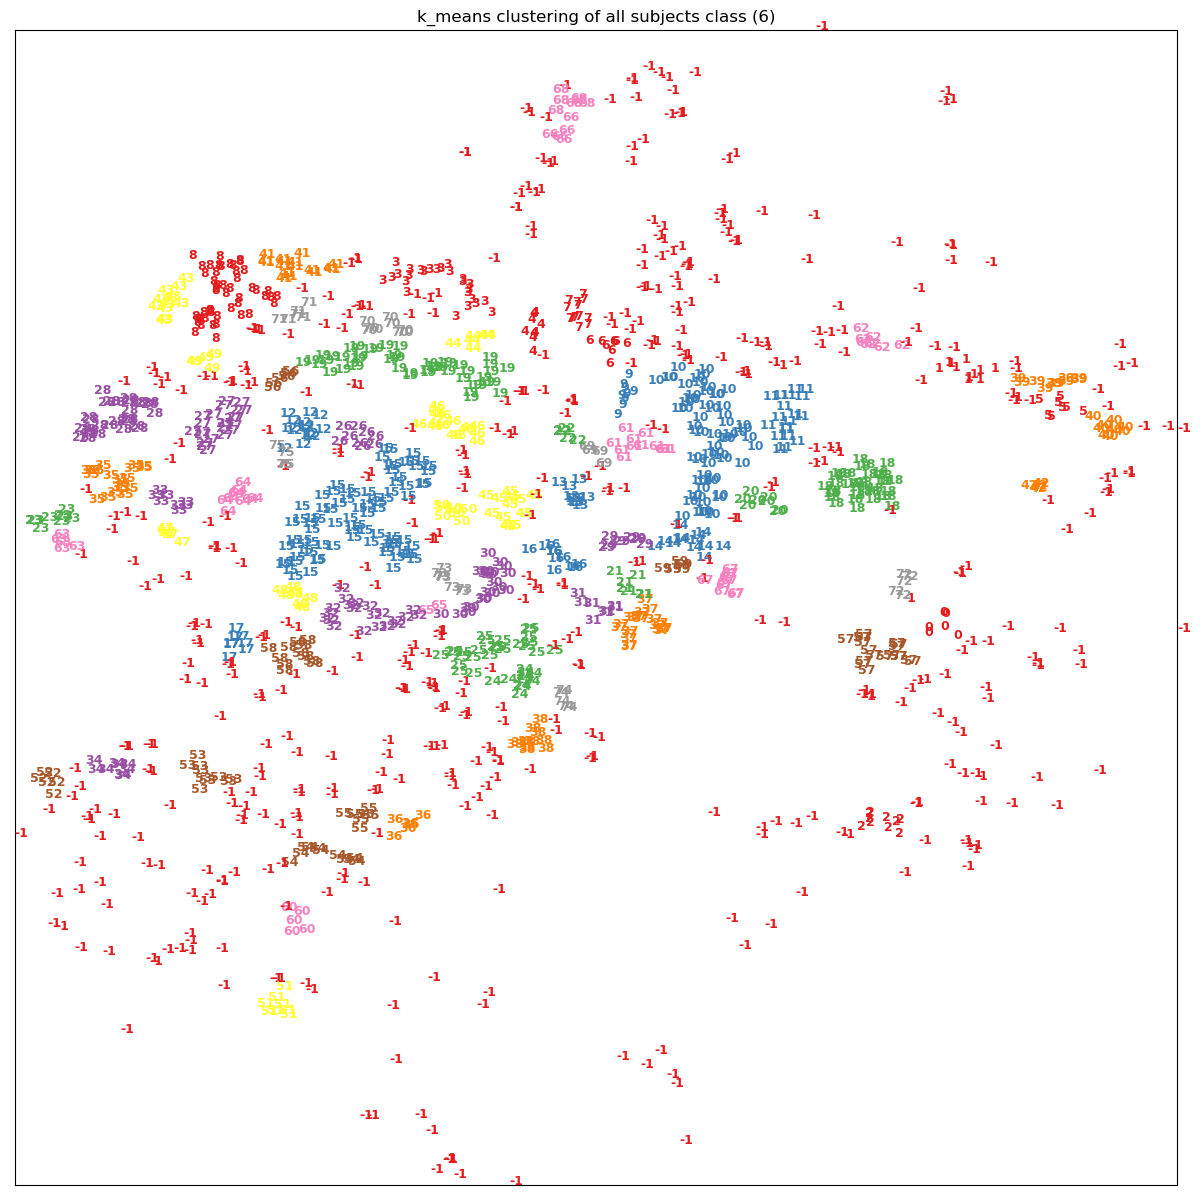

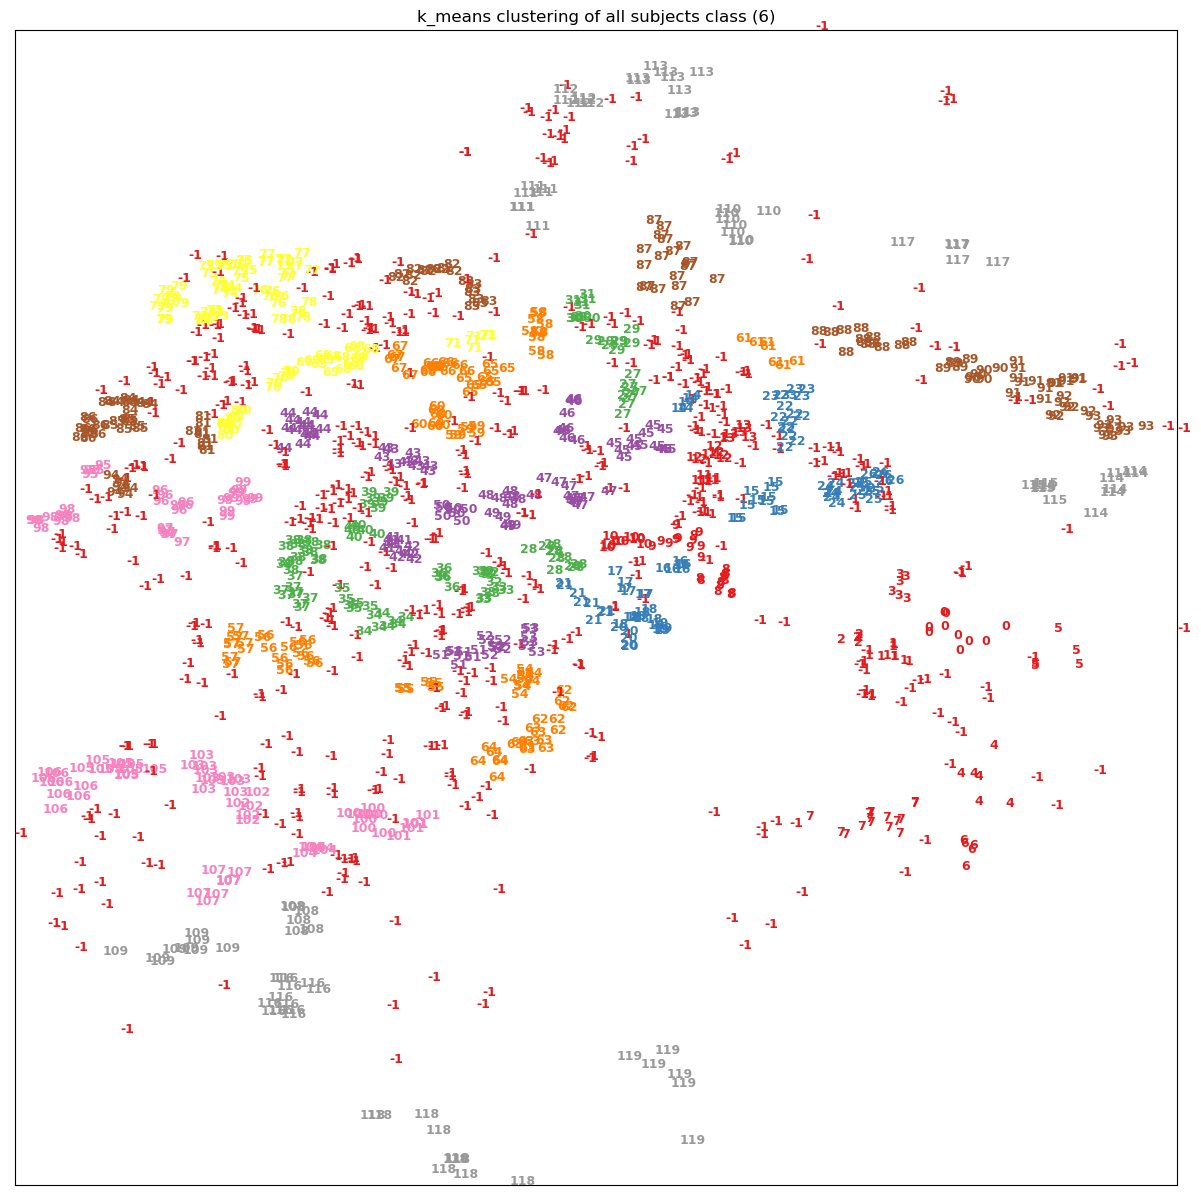

1.014553038510025 1.7147296143870054 2.131036263499026
2.72928265289703


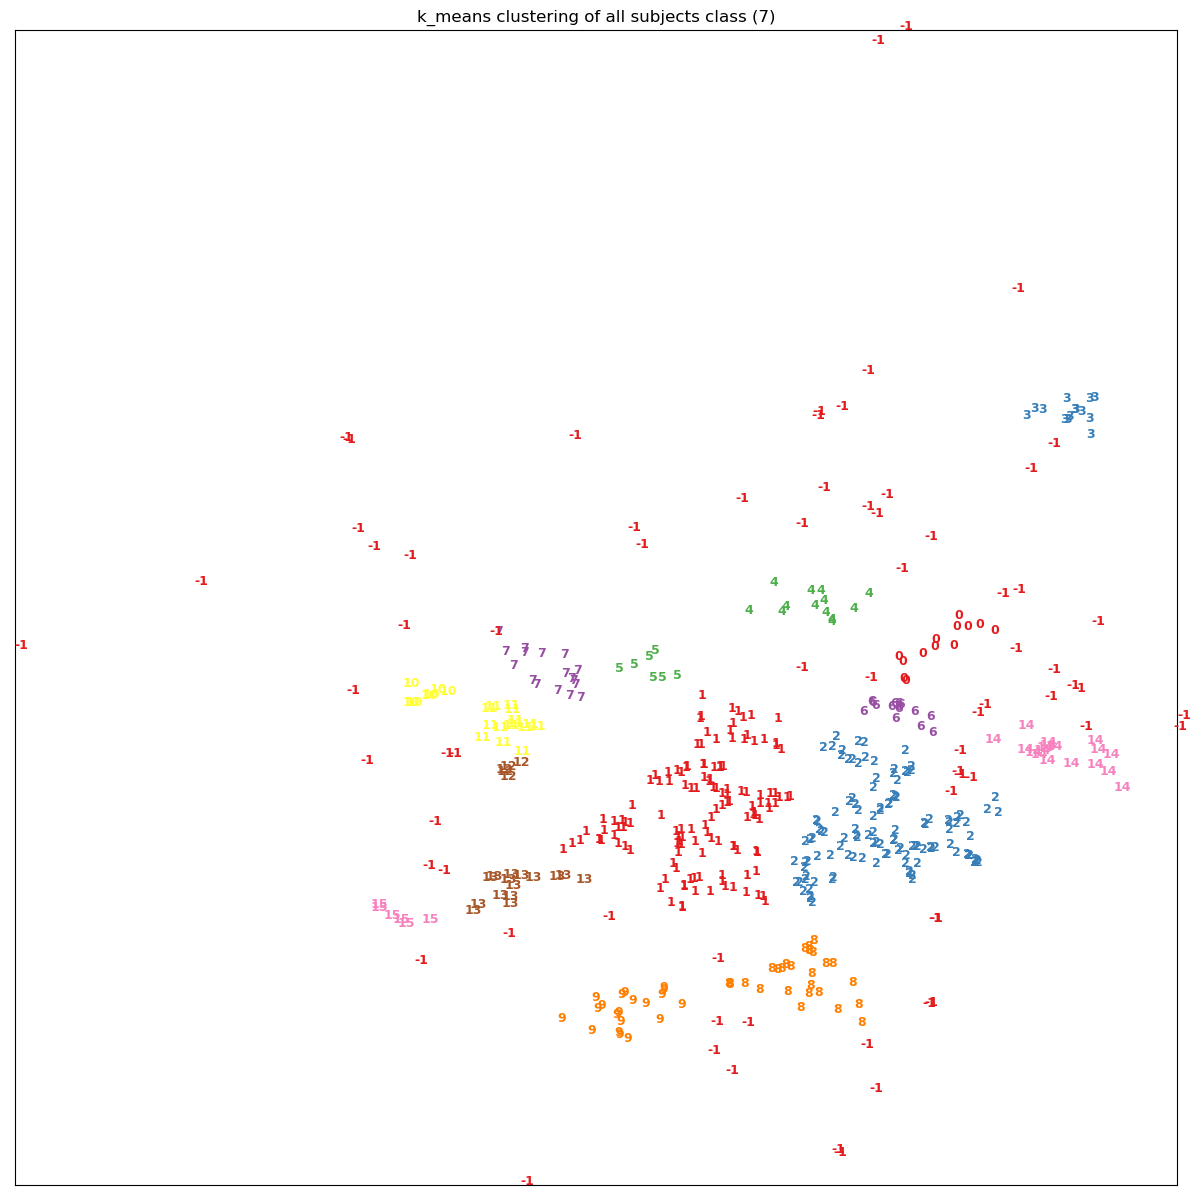

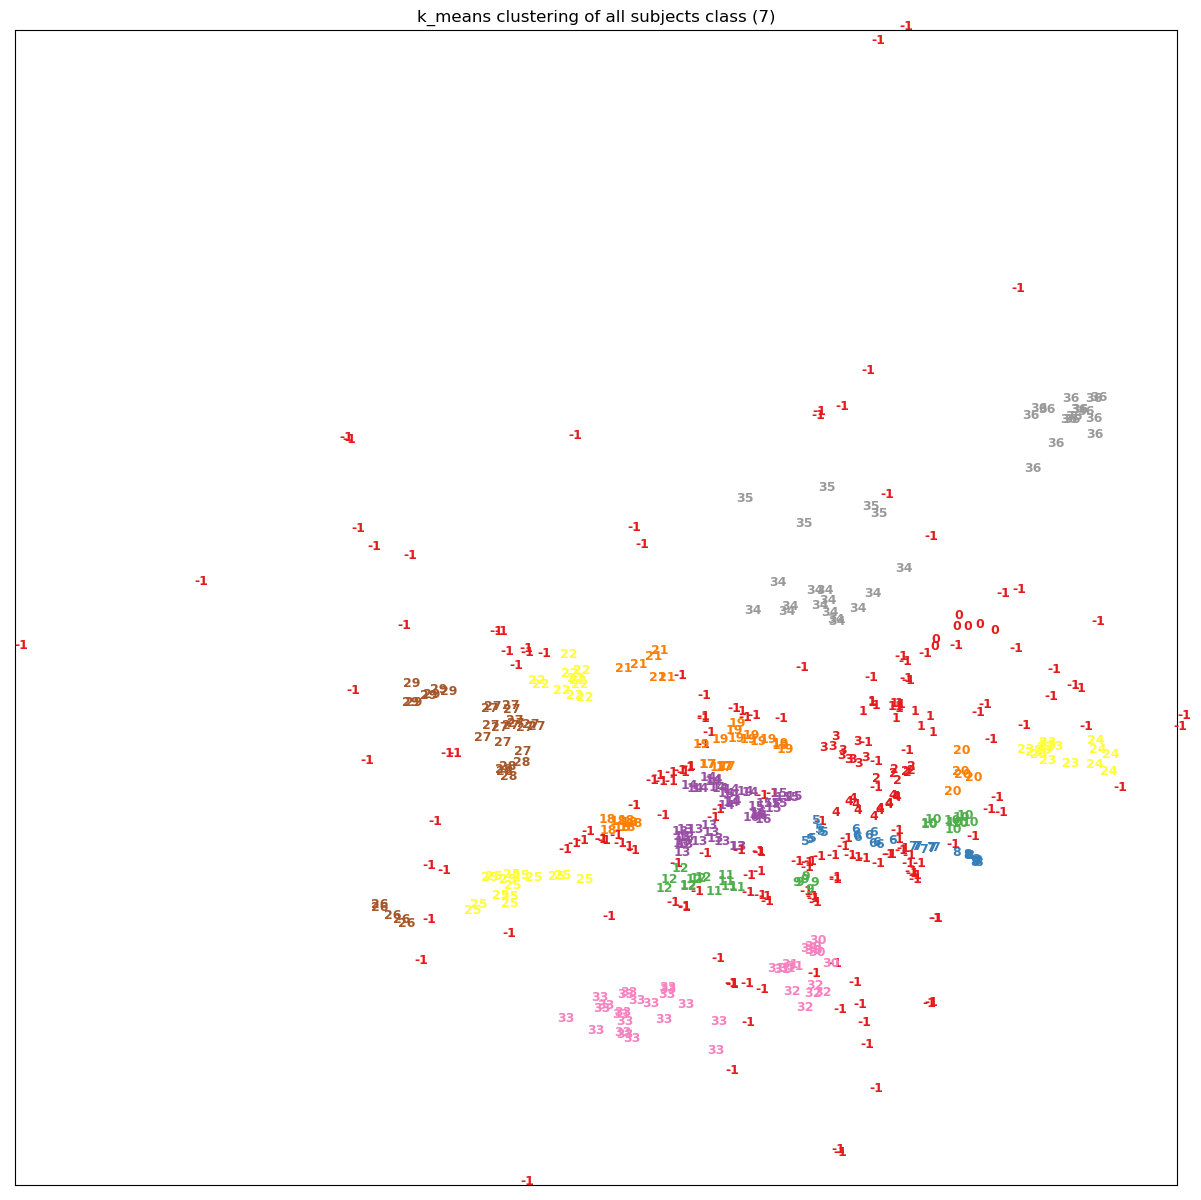

0.6984626959456246 1.0413736484260803 1.2677240377669183
1.7398363443717049


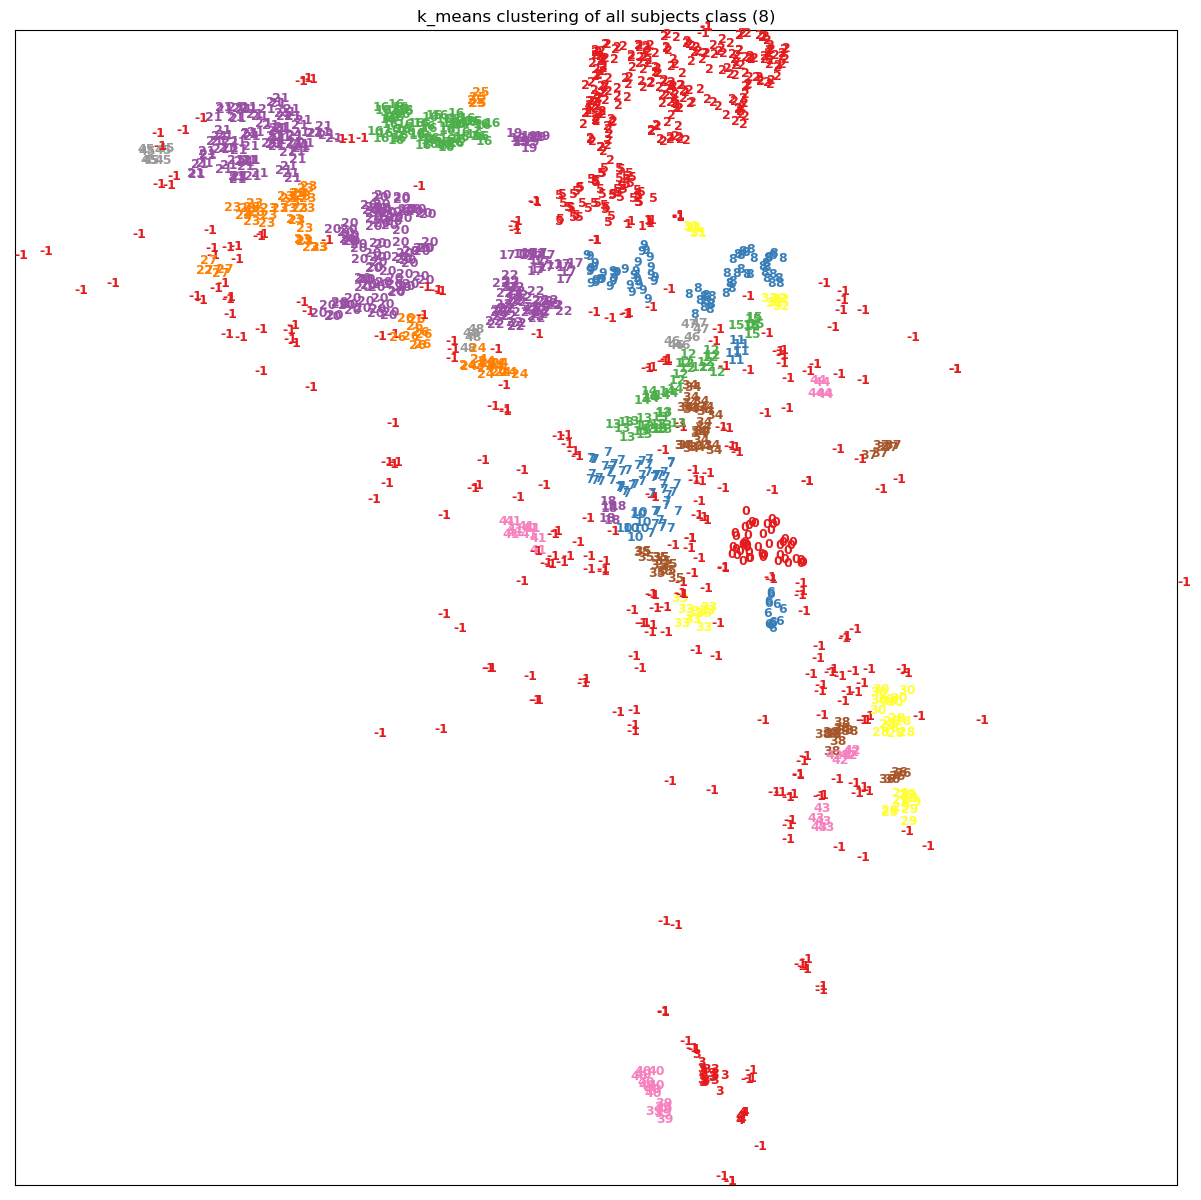

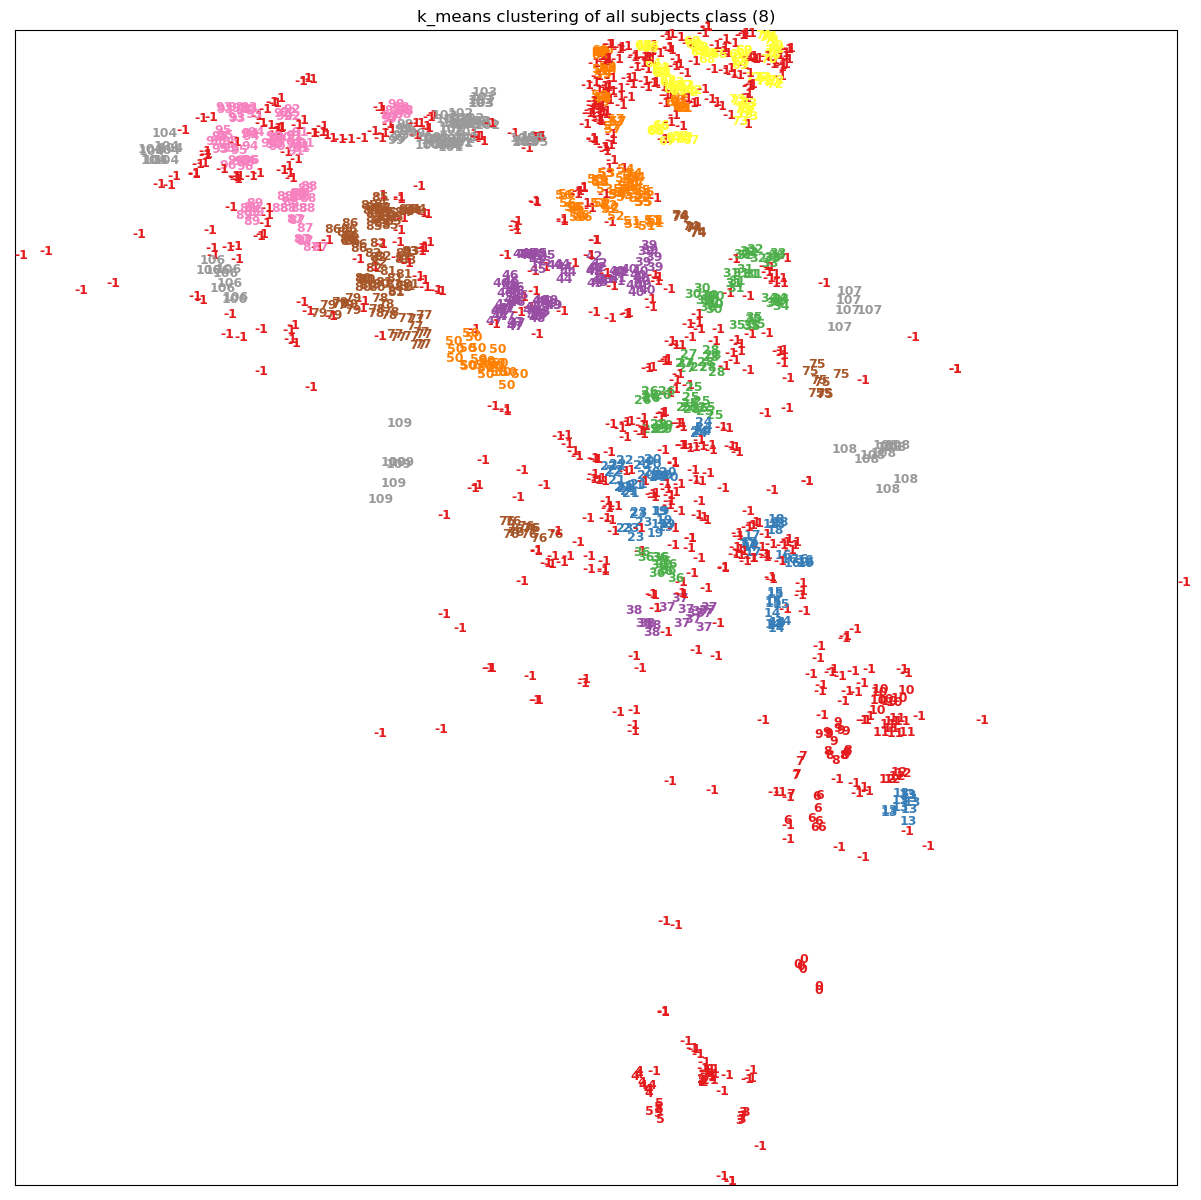

0.5919987802112117 1.5007754059438305 0.9564484090547968
2.092774186155042


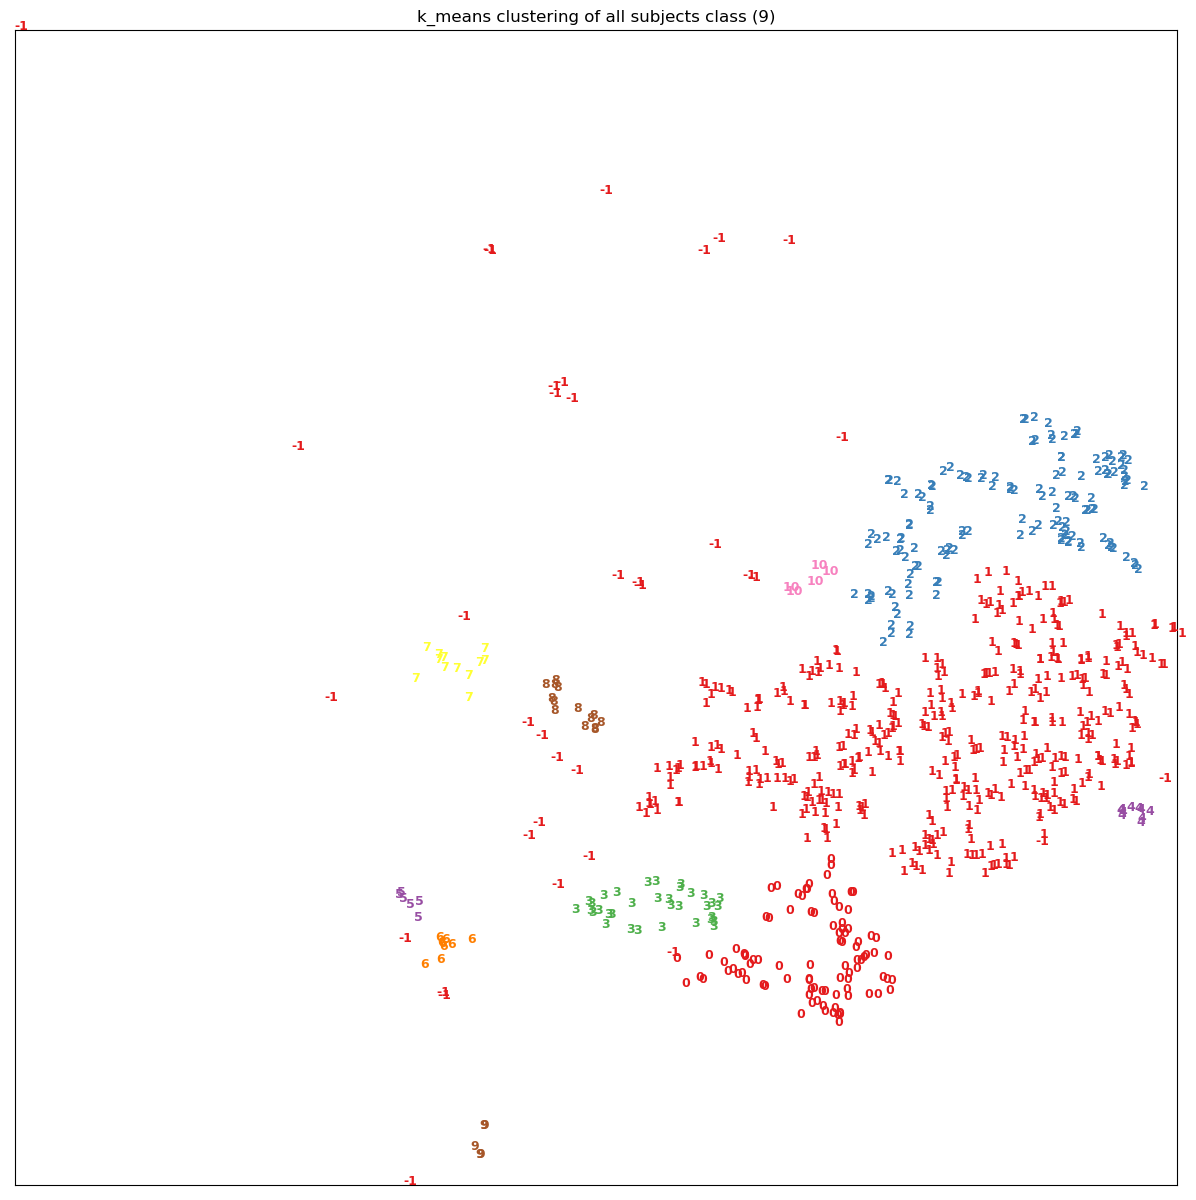

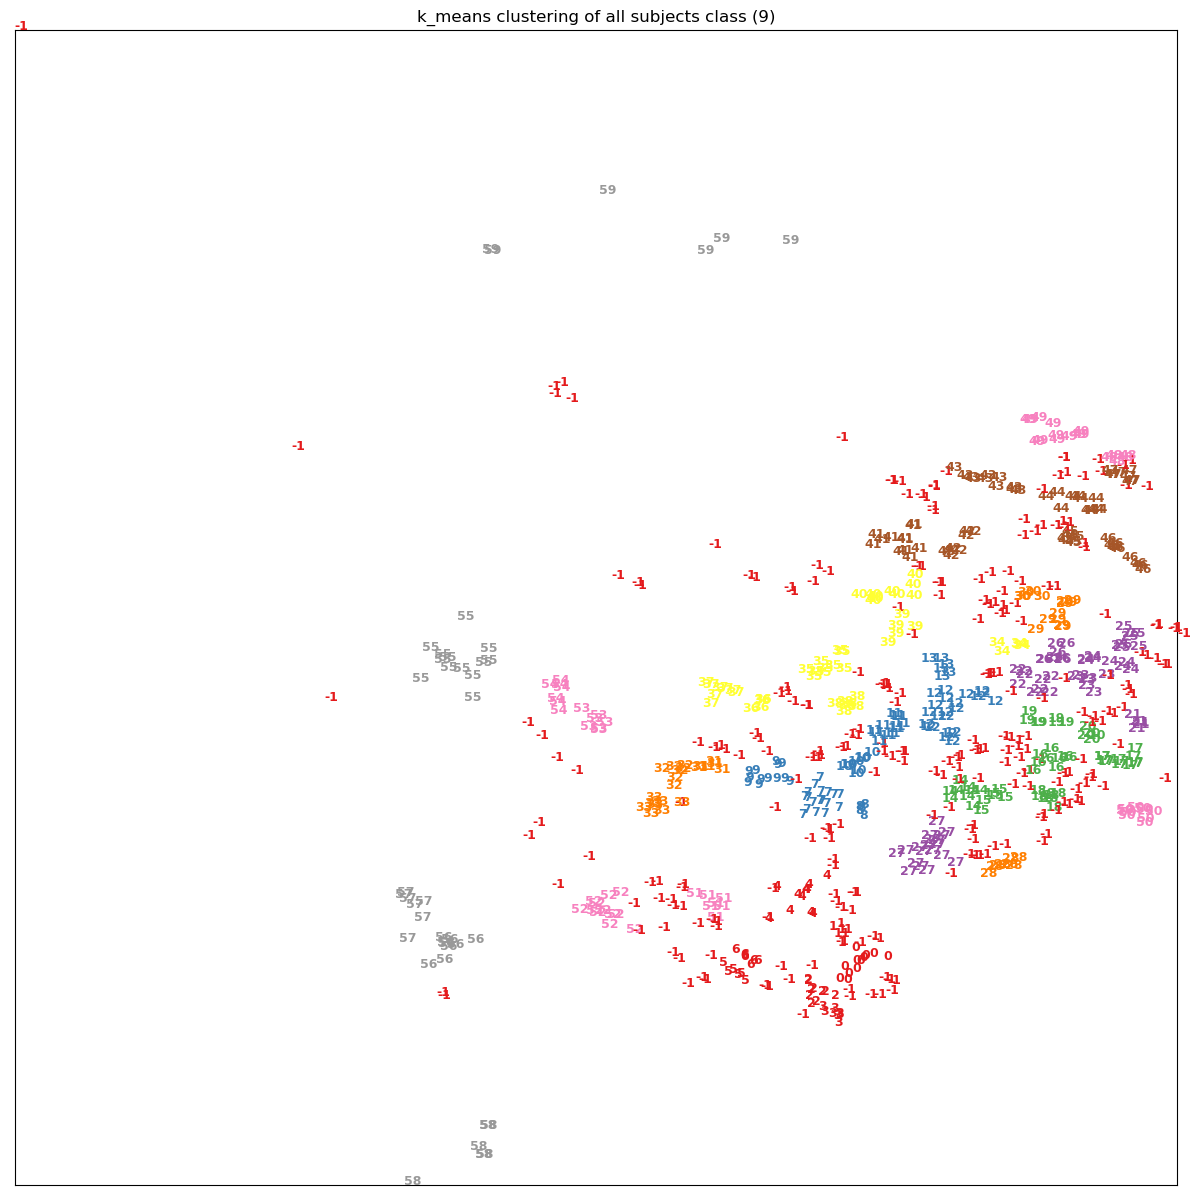

(598, 2912)

In [202]:
cluster_ttl=0
noise_ttl=0
for i in range(10):
    epsilon=observe_and_decide_epsilon(class_result[i])
    print(epsilon)
    cluster_num,noise_num=DBSCAN_opt(class_result[i],epsilon)
    cluster_num,noise_num=OPTIC_clustering(class_result[i])
    cluster_ttl=cluster_ttl+cluster_num
    noise_ttl=noise_ttl+noise_num
cluster_ttl,noise_ttl

In [ ]:
2:(207, 1168)
np.array(distances).mean()+np.array(distances).std():(274, 1575)
np.array(distances).mean():(168, 6676)
OPTICS:(598, 2912)